In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import os
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
os.chdir('/content/gdrive/My Drive/ghungroo')

In [4]:
data = pd.read_excel('BIGRS_Round_3_Helmet_Usage_Data (1) (1).xlsx')

In [5]:
data.head()

,location,day,month,year,start_time,weather,weather.1,id,number_occupants,law_enforcement,driver_helmet,driver_helmet_type,driver_age_category,driver_sex,passenger_helmet_1,passenger_helmet_type_1,passenger_age_category_1,passenger_sex_1,passenger_helmet_2,passenger_helmet_type_2,passenger_age_category_2,passenger_sex_2,Unnamed: 22,Date
0,Chembur,10,6,2016,07:30:00,1,999,1,1,1,1,1,1,1,999,999,999,999,999,999,999,999,NaN,10/6/2016
1,Chembur,10,6,2016,07:30:00,1,999,2,1,1,1,2,1,1,999,999,999,999,999,999,999,999,NaN,10/6/2016
2,Chembur,10,6,2016,07:30:00,1,999,3,1,1,1,2,1,1,999,999,999,999,999,999,999,999,NaN,10/6/2016
3,Chembur,10,6,2016,07:30:00,1,999,4,1,1,0,0,1,1,999,999,999,999,999,999,999,999,NaN,10/6/2016
4,Chembur,10,6,2016,07:30:00,1,999,5,1,1,1,2,1,1,999,999,999,999,999,999,999,999,NaN,10/6/2016


In [6]:
data.columns

Index(['location', 'day', 'month', 'year', 'start_time', 'weather',
       'weather.1', 'id', 'number_occupants', 'law_enforcement',
       'driver_helmet', 'driver_helmet_type', 'driver_age_category',
       'driver_sex', 'passenger_helmet_1', 'passenger_helmet_type_1',
       'passenger_age_category_1', 'passenger_sex_1', 'passenger_helmet_2',
       'passenger_helmet_type_2', 'passenger_age_category_2',
       'passenger_sex_2', 'Unnamed: 22', 'Date'],
      dtype='object')

In [7]:
x_data = data[['Date','location','start_time','number_occupants','law_enforcement',
        'driver_helmet_type', 'driver_age_category',
       'driver_sex','driver_helmet']]

In [8]:
x_data.head()

,Date,location,start_time,number_occupants,law_enforcement,driver_helmet_type,driver_age_category,driver_sex,driver_helmet
0,10/6/2016,Chembur,07:30:00,1,1,1,1,1,1
1,10/6/2016,Chembur,07:30:00,1,1,2,1,1,1
2,10/6/2016,Chembur,07:30:00,1,1,2,1,1,1
3,10/6/2016,Chembur,07:30:00,1,1,0,1,1,0
4,10/6/2016,Chembur,07:30:00,1,1,2,1,1,1


In [9]:
x_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218944 entries, 0 to 218943
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Date                 218944 non-null  object
 1   location             218944 non-null  object
 2   start_time           218944 non-null  object
 3   number_occupants     218944 non-null  int64 
 4   law_enforcement      218944 non-null  int64 
 5   driver_helmet_type   218939 non-null  object
 6   driver_age_category  218944 non-null  int64 
 7   driver_sex           218944 non-null  int64 
 8   driver_helmet        218944 non-null  int64 
dtypes: int64(5), object(4)
memory usage: 15.0+ MB


In [10]:
x_data.isnull().sum()

Date                   0
location               0
start_time             0
number_occupants       0
law_enforcement        0
driver_helmet_type     5
driver_age_category    0
driver_sex             0
driver_helmet          0
dtype: int64

In [11]:
x_data = x_data.dropna()

In [12]:
x_data.isnull().sum()

Date                   0
location               0
start_time             0
number_occupants       0
law_enforcement        0
driver_helmet_type     0
driver_age_category    0
driver_sex             0
driver_helmet          0
dtype: int64

In [13]:
x_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 218939 entries, 0 to 218943
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Date                 218939 non-null  object
 1   location             218939 non-null  object
 2   start_time           218939 non-null  object
 3   number_occupants     218939 non-null  int64 
 4   law_enforcement      218939 non-null  int64 
 5   driver_helmet_type   218939 non-null  object
 6   driver_age_category  218939 non-null  int64 
 7   driver_sex           218939 non-null  int64 
 8   driver_helmet        218939 non-null  int64 
dtypes: int64(5), object(4)
memory usage: 16.7+ MB


In [14]:
x_data.head()

,Date,location,start_time,number_occupants,law_enforcement,driver_helmet_type,driver_age_category,driver_sex,driver_helmet
0,10/6/2016,Chembur,07:30:00,1,1,1,1,1,1
1,10/6/2016,Chembur,07:30:00,1,1,2,1,1,1
2,10/6/2016,Chembur,07:30:00,1,1,2,1,1,1
3,10/6/2016,Chembur,07:30:00,1,1,0,1,1,0
4,10/6/2016,Chembur,07:30:00,1,1,2,1,1,1


In [15]:
x_data.Date = pd.to_datetime(x_data.Date)
x_data.set_index('Date',inplace=True)

In [16]:
x_data['weekday'] = x_data.index.dayofweek

In [17]:
(x_data['weekday']==6).sum()

24574

In [18]:
(x_data['weekday']==5).sum()

39411

In [19]:
(x_data['weekday']==1).sum()

26595

In [20]:
x_data.shape

(218939, 9)

In [21]:
x_data= x_data[x_data['driver_helmet_type'] != 999]

In [22]:
x_data.shape

(218841, 9)

In [23]:
for i in x_data.columns:
    print(i,x_data[i].unique())

location ['Chembur' 'Vikhroli' 'JVLR Powai' 'Malad East' 'CST' 'Matunga'
 'Worli west' 'Vile Parle West' 'Borivali west' 'Marine Lines'
 ' Marine Lines']
start_time [datetime.time(7, 30) datetime.time(10, 0) datetime.time(12, 30)
 datetime.time(15, 0) datetime.time(17, 30)]
number_occupants [1 2 3 4 5 0 6]
law_enforcement [1 0 2]
driver_helmet_type [1 2 0 ' ']
driver_age_category [1 0]
driver_sex [1 0]
driver_helmet [  1   0   2 999]
weekday [3 1 0 6 2 5 4]


In [24]:
x_data= x_data[x_data['driver_helmet'] != 999]

In [25]:
x_data.shape

(218840, 9)

In [26]:
(x_data['weekday'] < 5).sum()

154877

In [27]:
x_data['weekday'].where(~(x_data['weekday']<5),other=0,inplace=True)

In [28]:
(x_data['weekday']==0).sum()

154877

In [29]:
x_data['weekday'].where(~(x_data['weekday']>= 5),other=1,inplace=True)

In [30]:
(x_data['weekday']==1).sum()

63963

In [31]:
x_data['location']=x_data['location'].replace(' marine line','marine line')

In [32]:
x_data['location'].unique()

array(['Chembur', 'Vikhroli', 'JVLR Powai', 'Malad East', 'CST',
       'Matunga', 'Worli west', 'Vile Parle West', 'Borivali west',
       'Marine Lines', ' Marine Lines'], dtype=object)

In [33]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [34]:
x_data['location'] = le.fit_transform(x_data['location'])

In [35]:
print(le.classes_)

[' Marine Lines' 'Borivali west' 'CST' 'Chembur' 'JVLR Powai' 'Malad East'
 'Marine Lines' 'Matunga' 'Vikhroli' 'Vile Parle West' 'Worli west']


In [36]:
print(len(le.classes_))

11


In [37]:
x_data['start_time'] = le.fit_transform(x_data['start_time'].astype(str))

In [38]:
print(le.classes_)

['07:30:00' '10:00:00' '12:30:00' '15:00:00' '17:30:00']


In [39]:
print(len(le.classes_))

5


In [40]:
x_data

,location,start_time,number_occupants,law_enforcement,driver_helmet_type,driver_age_category,driver_sex,driver_helmet,weekday
Date,,,,,,,,,
2016-10-06,3,0,1,1,1,1,1,1,0
2016-10-06,3,0,1,1,2,1,1,1,0
2016-10-06,3,0,1,1,2,1,1,1,0
2016-10-06,3,0,1,1,0,1,1,0,0
2016-10-06,3,0,1,1,2,1,1,1,0
...,...,...,...,...,...,...,...,...,...
2018-09-24,2,4,2,0,0,1,1,0,0
2018-09-24,2,4,1,0,1,1,1,1,0
2018-09-24,2,4,1,0,2,1,1,2,0


In [41]:
x_data.shape

(218840, 9)

In [42]:
x_data.reset_index(drop=True,inplace=True)

In [43]:
x_data

,location,start_time,number_occupants,law_enforcement,driver_helmet_type,driver_age_category,driver_sex,driver_helmet,weekday
0,3,0,1,1,1,1,1,1,0
1,3,0,1,1,2,1,1,1,0
2,3,0,1,1,2,1,1,1,0
3,3,0,1,1,0,1,1,0,0
4,3,0,1,1,2,1,1,1,0
...,...,...,...,...,...,...,...,...,...
218835,2,4,2,0,0,1,1,0,0
218836,2,4,1,0,1,1,1,1,0
218837,2,4,1,0,2,1,1,2,0
218838,2,4,1,0,1,1,1,2,0


In [44]:
x_data = x_data[x_data['driver_helmet_type'] != ' ']

In [45]:
x_data.shape

(218839, 9)

In [46]:
x_data['driver_helmet_type']=pd.to_numeric(x_data['driver_helmet_type'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [47]:
x_data['driver_helmet_type']=x_data['driver_helmet_type'].astype(float)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [48]:
y_data = x_data['driver_helmet']

In [49]:
y_data.shape

(218839,)

In [50]:
(y_data[y_data==0]).shape

(21382,)

In [51]:
(y_data[y_data==1]).shape

(99633,)

In [52]:
(y_data[y_data==2]).shape

(97824,)

In [53]:
x_data = x_data.drop(['driver_helmet'],axis=1)

In [54]:
from sklearn.ensemble import RandomForestClassifier

In [55]:
x_data = x_data.drop(['weekday'],axis=1)

In [56]:
x_data = x_data.drop(['driver_age_category'],axis=1)

In [57]:
#x_data = x_data.drop(['driver_helmet_type'],axis=1)

In [58]:
x_data

,location,start_time,number_occupants,law_enforcement,driver_helmet_type,driver_sex
0,3,0,1,1,1.0,1
1,3,0,1,1,2.0,1
2,3,0,1,1,2.0,1
3,3,0,1,1,0.0,1
4,3,0,1,1,2.0,1
...,...,...,...,...,...,...
218835,2,4,2,0,0.0,1
218836,2,4,1,0,1.0,1
218837,2,4,1,0,2.0,1
218838,2,4,1,0,1.0,1


In [62]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_data,y_data,test_size=0.20)

In [63]:
rf_mdl = RandomForestClassifier(oob_score=True)
rf_mdl.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=True, random_state=None,
                       verbose=0, warm_start=False)

In [64]:
rf_mdl.oob_score_

0.6276482112971309

In [66]:
y_pred = rf_mdl.predict(x_test)

In [74]:
impp=[]
feat = []
for feature,imp in zip(x_data.columns,rf_mdl.feature_importances_):
    feat.append(feature)
    impp.append(imp*100)
impp.remove(impp[4])
feat.remove('driver_helmet_type')

<BarContainer object of 5 artists>

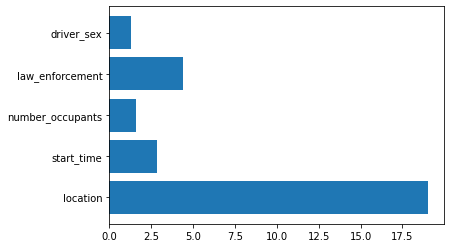

In [75]:
plt.barh(feat,impp)

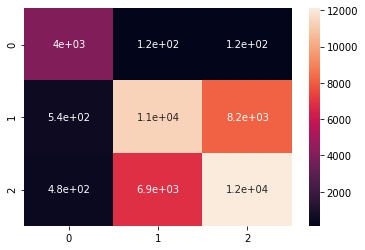

In [76]:
from sklearn.metrics import classification_report,confusion_matrix
cm=confusion_matrix(y_test,y_pred)
import seaborn as sns
sns.heatmap(cm,annot=True)

In [77]:
print(classification_report(y_test,y_pred,target_names=['class0','class1','class2']))

              precision    recall  f1-score   support

      class0       0.80      0.94      0.87      4253
      class1       0.62      0.57      0.59     20033
      class2       0.59      0.62      0.61     19482

    accuracy                           0.63     43768
   macro avg       0.67      0.71      0.69     43768
weighted avg       0.62      0.63      0.62     43768

